This example shows how to interpolate the fMRI timecourse if the stimulus
duration is not equal to the duration of the TR. Imagine that there are 
100 TRs and each lasts for 1s, while your stimulus duration is only 0.5s
The stimulus starts with the TR onset. To correctly code the stimulus 
onset in your design matrix you need 200 rows in your design matrix 
(but you only have 100 fMRI volumes). Interpolation of the timecourse is 
necessary to match the size of rows in your design matrix. 

In [1]:
import numpy as np
import scipy as sc
import glmsingle
import matplotlib.pyplot as plt
from tseriesinterp import tseriesinterp


In [2]:
TRs = 100
TR = 1
stimdur = 0.5
TRs_after_resampling = TR/stimdur*TR


In [3]:
# Use an example hrf and create an example fMRI time series.
cond1 = np.zeros([TRs,1])
cond2 = np.zeros([TRs,1])


#cond1 = cond1[:,0]
#cond2 = cond1[:,1]
cond1[::20] = 1
cond2[::30] = 1


hrf = glmsingle.glmsingle.getcanonicalhrf(stimdur,TR)
'''
tcs = tcs[0:len(cond1)]
tcs2 = np.convolve(cond2,hrf)
tcs2 = tcs2[0:len(cond2)]


cond1 = np.zeros([TRs,2])
np.shape(cond1)
'''
tcs = np.convolve(cond1[:,0],hrf)
tcs = tcs[0:len(cond1)]
tcs2 = np.convolve(cond2[:,0],hrf)
tcs2 = tcs2[0:len(cond2)]


cond1 = (cond1[:,0])
cond2 = (cond2[:,0])

tcs = (tcs,tcs2)
np.shape(tcs)
#tcs = ([cond1[:,0],cond2[:,0]))


#np.shape(tcs)



(2, 100)

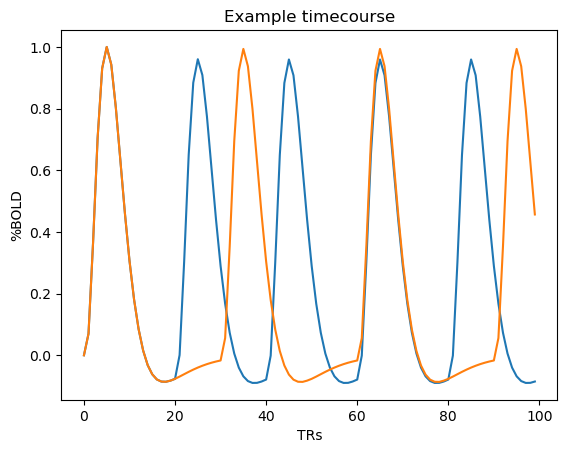

In [4]:
plt.plot(np.transpose(tcs))
plt.xlabel('TRs')
plt.ylabel('%BOLD')
plt.title('Example timecourse')
plt.show()

# Resample

In [5]:
#The following line resmaples the timecourse so that each timepoint will
#correspond to 0.5 s instead of 1 s. The tseriesinterp is not a function
#available in GLMsingle but you can download it form github 
#https://github.com/Charestlab/pyslicetime/blob/master/slicetime/tseriesinterp.py

#tseriesinterp
tcs =(np.array((tcs)))
y1 = tseriesinterp(tcs,1,0.5)



In [6]:
def reshape2D(m, dim):
    """
    shift dimension <dim> to the beginning,
    then reshape to be a 2D matrix.
    see also reshape2D_undo

    Args:
        m ([type]): <m> is a matrix
        dim ([type]): <dim> is a dimension of <m>

    Returns:
        <f> a reshaped 2D matrix

    Example:
        a = np.random.randn(3,4,5)
        b = reshape2D(a,1)
        assert(b.shape == (4, 15))
    """

    # permute and then squish into a 2D matrix
    f = np.moveaxis(m, dim, 0).reshape((m.shape[dim], -1), order='F')

    return f

In [7]:
tcs = (np.reshape(tcs,[2,1,100]))
#help(tseriesinterp)
np.shape(tcs)
m = tcs
msize = np.asarray(m.shape)
msize
len(msize) > 1
dim = len(m.shape)-1


mflat = reshape2D(m, dim)
np.shape(mflat)
numsamples = int(np.ceil((mflat.shape[0]*1)/0.5))
numsamples
#y1 = tseriesinterp(tcs,1,0.5);
numsamples
tcs_interp = tseriesinterp(tcs,1,0.5)

np.shape(tcs_interp)

(2, 1, 200)

In [14]:
timeorig = \
[0.0 + x*(1*mflat.shape[0])/len(mflat)
                for x in range(len(mflat))]


timenew = \
[0.0 + x*(0.5*numsamples)/numsamples 
                for x in range(int(numsamples))]
fakeout = 1
timenew = [0.0 + x*(0.5*numsamples) /
               numsamples - fakeout for x in range(int(numsamples))] 

timenew

[-1.0,
 -0.5,
 0.0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5,
 20.0,
 20.5,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 25.5,
 26.0,
 26.5,
 27.0,
 27.5,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 30.5,
 31.0,
 31.5,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.5,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 45.5,
 46.0,
 46.5,
 47.0,
 47.5,
 48.0,
 48.5,
 49.0,
 49.5,
 50.0,
 50.5,
 51.0,
 51.5,
 52.0,
 52.5,
 53.0,
 53.5,
 54.0,
 54.5,
 55.0,
 55.5,
 56.0,
 56.5,
 57.0,
 57.5,
 58.0,
 58.5,
 59.0,
 59.5,
 60.0,
 60.5,
 61.0,
 61.5,
 62.0,
 62.5,
 63.0,
 63.5,
 64.0,
 64.5,
 65.0,
 65.5,
 66.0,
 66.5,
 67.0,
 67.5,
 68.0,
 68.5,
 69.0,
 69.5,
 70.0,
 70.5,
 71.0,
 71.5

In [9]:
range(int(numsamples))
numsamples

numsamples
for x in range(int(numsamples)) - fakeout:
    print(x)

NameError: name 'fakeout' is not defined